# Malthusian Model

In [ ]:
'''
Initial values:

P0: initial population
_lambda: finite grouth rate = 1+f-d
ntime: number of reproduction cycles for simulation
vP1: a vector storing population history(for graph)

'''
P0 = 50    
_lambda = 1.5
ntime = 20
vP1=[]
P=P0

# a calculation loop for a recursive linear model
for i in range(ntime):

    #recursive equation
    P=_lambda *P 

    #add the calculated population to a vector
    vP1.append(P)
print(vP1)

[75.0, 112.5, 168.75, 253.125, 379.6875, 569.53125, 854.296875, 1281.4453125, 1922.16796875, 2883.251953125, 4324.8779296875, 6487.31689453125, 9730.975341796875, 14596.463012695312, 21894.69451904297, 32842.04177856445, 49263.06266784668, 73894.59400177002, 110841.89100265503, 166262.83650398254]


# May Model

In [ ]:
'''
Initial values:

P0: initial population
_lambda: finite grouth rate = 1+f-d
ntime: number of reproduction cycles for simulation
r: maximum value of growth rate = f-d
K: carrying capacity
vP2: a vector storing population history(for graph)

'''
P0=50
_lambda = 1.5
ntime = 20
r=0.5
K=1000
vP2=[]
P=P0

# a calculation loop for a recursive non-linear model
for i in range(ntime):
    P = (1+r*(1-P/K))*P
    vP2.append(P)
print(vP2)

[73.75, 107.90546875, 156.03640803192138, 221.88093173212994, 308.20582366503584, 414.81332062703217, 536.1849354557357, 660.530260678768, 772.6452783819714, 860.47755446998, 920.5055208316512, 957.0930743067022, 977.626035017126, 988.5627203540356, 994.2159544941678, 997.0912496558772, 998.5413944136565, 999.2696334417001, 999.6345500031954, 999.8172082247477]


Text(0.5, 1.0, 'Recursive linear vs. Recursive non-linear')

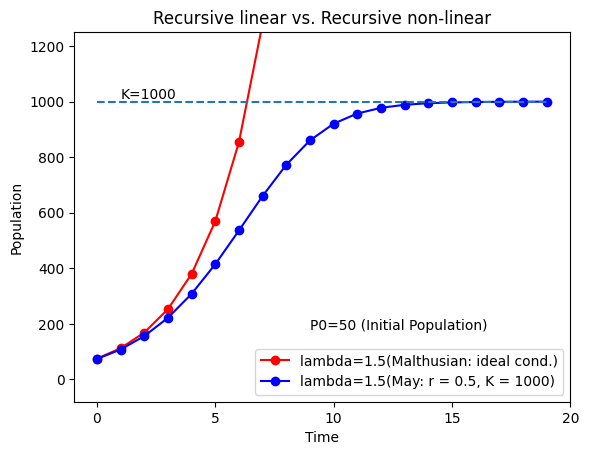

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make a vector of ntimes
nt = np.arange(0,ntime,1)

#graph of recursive linear model
plt.plot(nt,vP1,marker='o',color='red', label=f"lambda={_lambda}(Malthusian: ideal cond.)")

# graph of recursive non-linear model
plt.plot(nt,vP2,marker='o', color='blue', label=f"lambda={_lambda}(May: r = {r}, K = {K})")

# K value (asymptote)
plt.plot(nt,[K]*ntime, linestyle='--')

#graph styles
plt.yticks(np.arange(0,1201,200))
plt.xticks(np.arange(0,21,5))
plt.ylim(-80,1250)
plt.legend()
plt.text(9,180,f"P0={P0} (Initial Population)")
plt.text(1,1010,f"K={K}")
plt.ylabel('Population')
plt.xlabel('Time')
plt.title('Recursive linear vs. Recursive non-linear')

# Cobweb function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def cobweb(r, K, P0, ntimes, xmin, xmax):
    # f: recursive model function
    # P0: initial population
    # r: maximum value of growth rate = f-d
    # K: carrying capacity
    # xmin, xmax: x range

    # a function of drawing the may model
    def May():

        # list of population history
        vP = [P0]
        # list of ntimes
        t = [0]
        # initial value
        P = P0

        # a calculation loop for a recursive non-linear model
        for i in range(1, ntimes):
            P = (1 + r * (1 - P / K)) * P
            vP.append(P)
            t.append(i)
        
        return (t,vP)

    #graph
    plt.plot(May()[0], May()[1], color='blue', label = f"r={r}, K={K}, P0={P0})")
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f"The May Model")
    plt.legend()
    plt.show()

    def May_cal(x):
        return (1 + r * (1 - x / K)) * x

    # create x values
    x = np.linspace(xmin, xmax, 1000)
    # draw may model
    plt.plot(x, May_cal(x), color='blue', label=f"May model: r={r}, K={K}, P0={P0})")

    # draw y=x function
    plt.plot([xmin, xmax], [xmin, xmax], color='black', linestyle='--', label='y=x')

    # initiate y value
    y = P0

    # Cobweb graphs
    for i in range(ntimes):
        # vertical line
        plt.plot([y, y], [y, May_cal(y)], color='black')
        #horizontal line
        plt.plot([y, May_cal(y)], [May_cal(y), May_cal(y)], color='black')
        # update y to f(y)
        y = May_cal(y)

    # P0 state
    plt.plot([P0, P0], [0, May_cal(P0)], color='black', linestyle='--')
    plt.xlabel(r'$P_t$')
    plt.ylabel(r'$P_{t+1}$')
    plt.title(f"Cobweb plot of the model above")
    plt.legend()
    plt.show()


# Simulate with different r values

### r=0.5

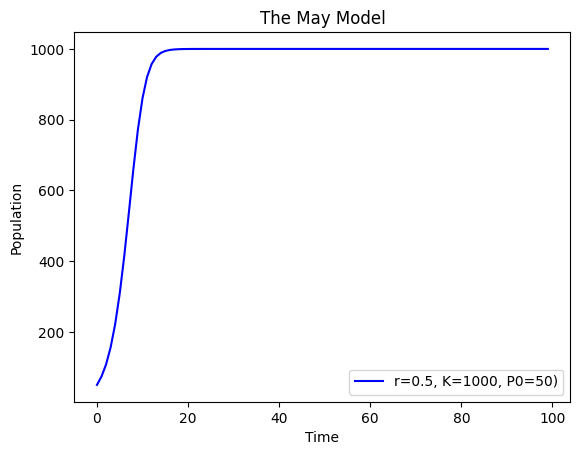

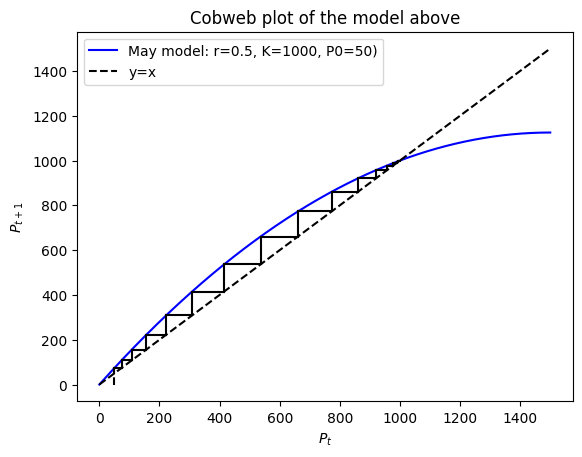

In [2]:
cobweb(r=0.5, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

### r=2

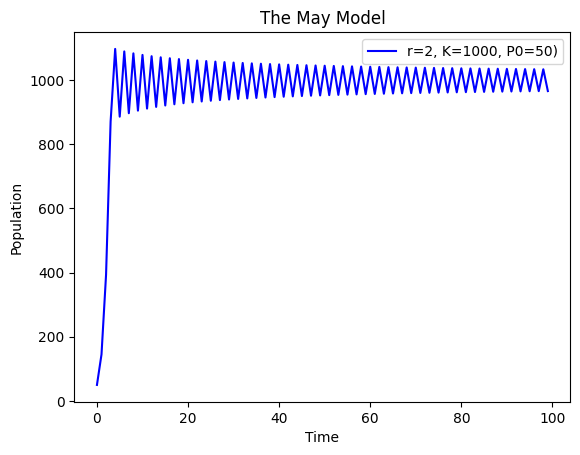

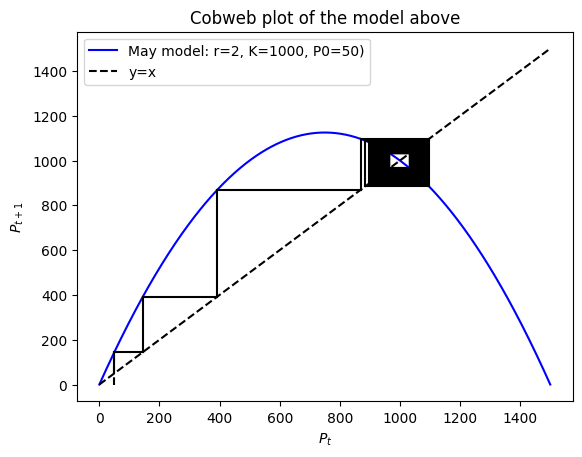

In [ ]:
cobweb(r=2, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

### r=2.1

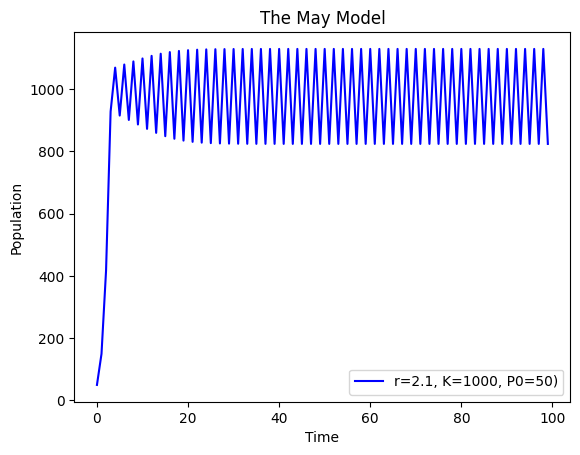

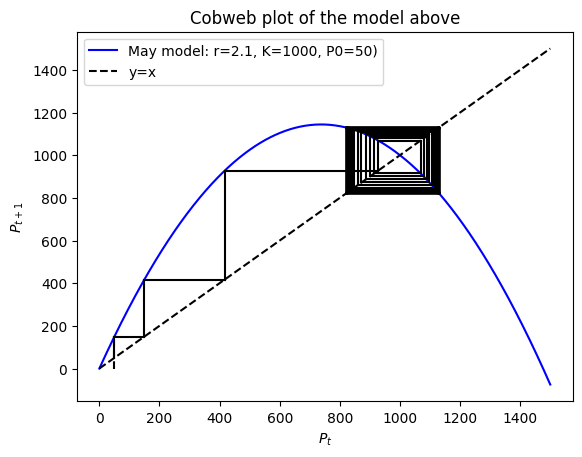

In [ ]:
cobweb(r=2.1, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

### r=2.7

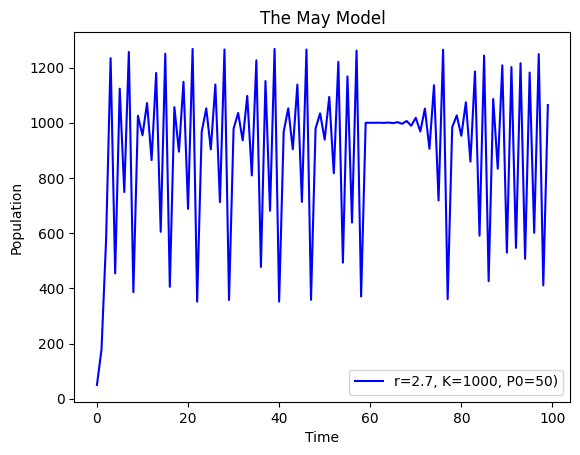

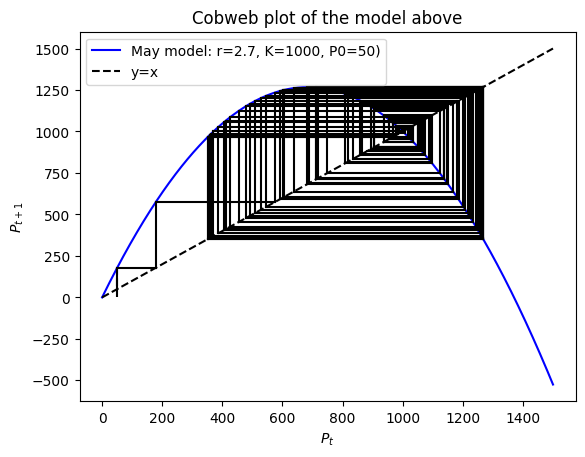

In [ ]:
cobweb(r=2.7, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

### r=3

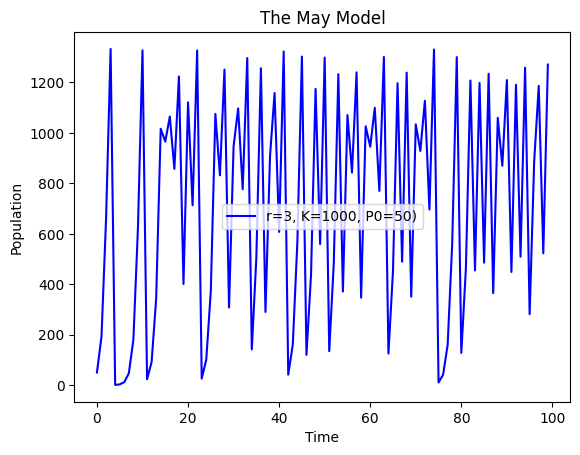

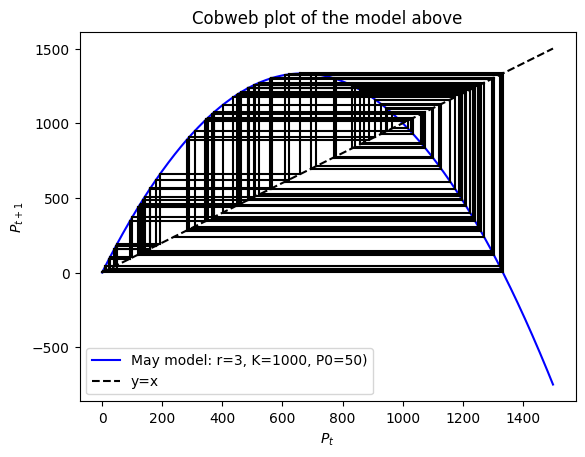

In [ ]:
cobweb(r=3, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

### r=3.2

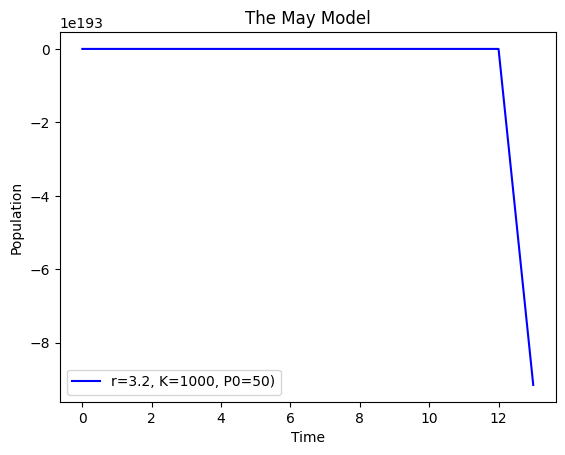

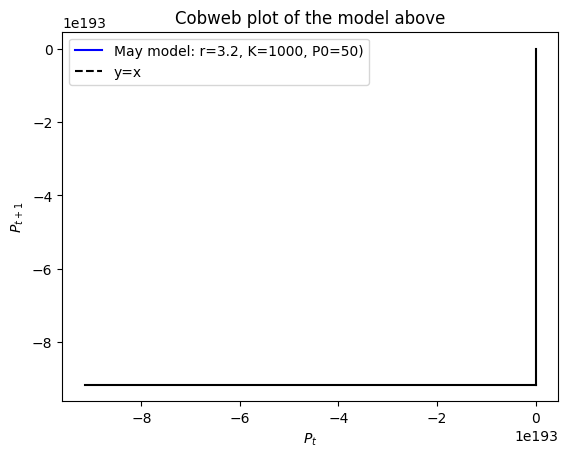

In [ ]:
cobweb(r=3.2, K=1000, P0=50, ntimes=100, xmin=0, xmax=1500)

# Bifurcation

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def may_bifurcation(interval, K, L, M):
    '''
    iterate the model for many time steps (L)
    continue iterating for lots of additional steps (M)
    '''
    # set the random value of P0
    #P0=np.random.randint(0,K)
    P0=50

    # set the r range
    rmin = 1
    rmax = 3.1

    # make a r vector
    rs = np.arange(rmin, rmax, interval)
    
    # empty arrays of length M.
    vP = np.zeros(M)
    vR = np.zeros(M)

    # iterating r value
    for r in rs:
        P = P0

        # iterate the model many times so that transient behavior is gone
        for i in range(L):
            P = (1 + r * (1 - P / K)) * P
        
        # append all possible P values for each r
        for i in range(M):
            P = (1 + r * (1 - P / K)) * P
            vP[i] = P
            vR[i] = r

        # plot the bifurcation diagram
        plt.scatter(vR, vP, color='blue', s=0.1, label=f"K={K}, L={L}, M={M})")
    
    # graph details
    plt.xlabel('r (finite intrinsic growth rate)')
    plt.ylabel('Populations from 501 to 700 cycles')
    plt.title(f"Bifurcation diagram for the May model")
    plt.show()


<ipython-input-44-d9b17f34e449>:30: RuntimeWarning: overflow encountered in double_scalars
  P = (1 + r * (1 - P / K)) * P


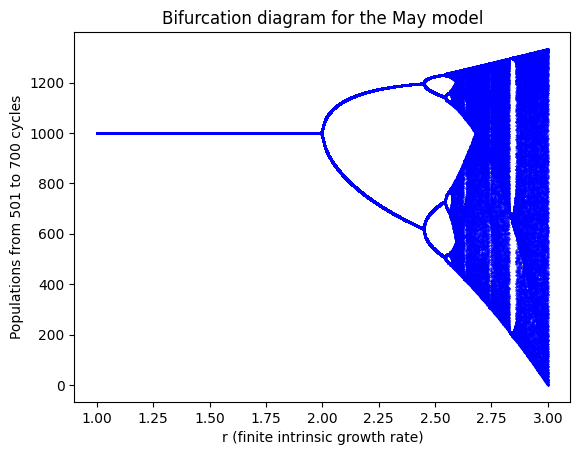

In [45]:
may_bifurcation(interval = 0.001, K= 1000, L = 500, M = 200)

# For questionnaire #2 
# x range (0,40), y range (0,40)
# r=0.7, K=10

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def cobweb(r, K, P0, ntimes, xmin, xmax):
    # f: recursive model function
    # P0: initial population
    # r: maximum value of growth rate = f-d
    # K: carrying capacity
    # xmin, xmax: x range

    # a function of drawing the may model
    def May():

        # list of population history
        vP = [P0]
        # list of ntimes
        t = [0]
        # initial value
        P = P0

        # a calculation loop for a recursive non-linear model
        for i in range(1, ntimes):
            P = (1 + r * (1 - P / K)) * P
            vP.append(P)
            t.append(i)
        
        return (t,vP)

    #graph
    plt.plot(May()[0], May()[1], color='blue', label = f"r={r}, K={K}, P0={P0})")
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f"The May Model")
    plt.legend()
    plt.show()

    def May_cal(x):
        return (1 + r * (1 - x / K)) * x

    # create x values
    x = np.linspace(xmin, xmax, 1000)
    # draw may model
    plt.plot(x, May_cal(x), color='blue', label=f"May model: r={r}, K={K}, P0={P0})")

    # draw y=x function
    plt.plot([xmin, xmax], [xmin, xmax], color='black', linestyle='--', label='y=x')

    # initiate y value
    y = P0

    # Cobweb graphs
    for i in range(ntimes):
        # vertical line
        plt.plot([y, y], [y, May_cal(y)], color='black')
        #horizontal line
        plt.plot([y, May_cal(y)], [May_cal(y), May_cal(y)], color='black')
        # update y to f(y)
        y = May_cal(y)

    # P0 state
    plt.plot([P0, P0], [0, May_cal(P0)], color='black', linestyle='--')
    plt.xlabel(r'$P_t$')
    plt.ylabel(r'$P_{t+1}$')
    plt.xlim([0,40])
    plt.ylim([0,40])
    plt.title(f"Cobweb plot of the model above")
    plt.legend()
    plt.show()


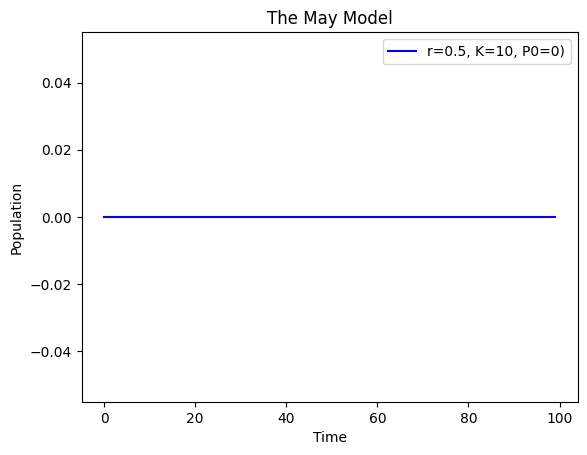

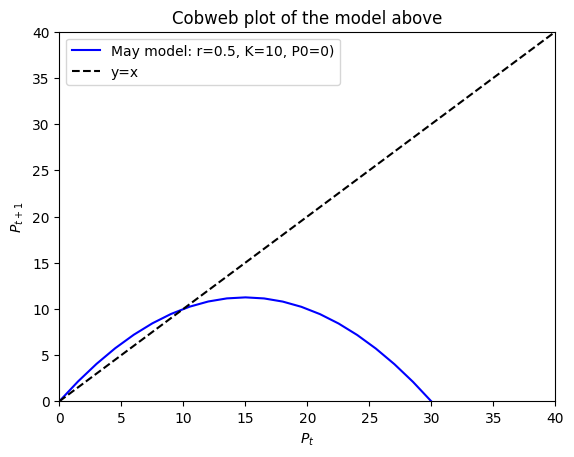

In [50]:
cobweb(r=0.5, K=10, P0=0, ntimes=100, xmin=0, xmax=1500)